## Function Description
Imagine a black box, or a mystery ML model, that takes two numbers as input and returns a log-likelihood score. The goal is to maximise that score, but each output is noisy, and depending on where you start, you might get stuck in a local optimum. 

## Load and Prepare Data

In [19]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel
from scipy.stats.qmc import Sobol
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(
    "ignore",
    category=ConvergenceWarning,
    module="sklearn"
)

# Load original dataset
X = np.load("../data/function_2/initial_inputs.npy")
y = np.load("../data/function_2/initial_outputs.npy")
d = X.shape[1] # dimension

print(f"original n: {len(X)}")
print()

# week 1 = initial

# week 2
x_new = np.array([[0.431029, 0.814368]])
y_new = np.array([0.044662929043219904])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 3
x_new = np.array([[0.961579, 0.311410]])
y_new = np.array([-0.04702992932176036])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 4
x_new = np.array([[0.252498, 0.926566]])
y_new = np.array([-0.048602532294232434])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 5
x_new = np.array([[0.704896, 0.926582]])
y_new = np.array([0.6329684991689146])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 6
x_new = np.array([[0.758745, 0.948009]])
y_new = np.array([0.2455804093765762])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 7
x_new = np.array([[0.724510, 0.926882]])
y_new = np.array([0.5528037329552555])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 8
x_new = np.array([[0.707983, 0.727555]])
y_new = np.array([0.5818109955635318])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 9
x_new = np.array([[0.699659, 0.925465]])
y_new = np.array([0.486495136073414])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 10
x_new = np.array([[0.690911, 0.125833]])
y_new = np.array([0.6110127302521364])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 11
x_new = np.array([[0.689295, 0.108432]])
y_new = np.array([0.6256361599559325])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 12
x_new = np.array([[0.679288, 0.110000]])
y_new = np.array([0.46968342027651827])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 13
x_new = np.array([[0.653881, 0.991404]])
y_new = np.array([0.38638581765041413])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# final submission
x_new = np.array([[0.706000, 0.927200]])
y_new = np.array([0.7041118083742135])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

print("X:\n", X)
print()
print("y:\n", y)
print()
print("n: ", len(y))
print()
idx_best = np.argmax(y)
print(f"current maximum:\nn: {idx_best+1}\ny: {y[idx_best]}\nX: {X[idx_best]}")

original n: 10

X:
 [[0.66579958 0.12396913]
 [0.87779099 0.7786275 ]
 [0.14269907 0.34900513]
 [0.84527543 0.71112027]
 [0.45464714 0.29045518]
 [0.57771284 0.77197318]
 [0.43816606 0.68501826]
 [0.34174959 0.02869772]
 [0.33864816 0.21386725]
 [0.70263656 0.9265642 ]
 [0.431029   0.814368  ]
 [0.961579   0.31141   ]
 [0.252498   0.926566  ]
 [0.704896   0.926582  ]
 [0.758745   0.948009  ]
 [0.72451    0.926882  ]
 [0.707983   0.727555  ]
 [0.699659   0.925465  ]
 [0.690911   0.125833  ]
 [0.689295   0.108432  ]
 [0.679288   0.11      ]
 [0.653881   0.991404  ]
 [0.706      0.9272    ]]

y:
 [ 0.53899612  0.42058624 -0.06562362  0.29399291  0.21496451  0.02310555
  0.24461934  0.03874902 -0.01385762  0.61120522  0.04466293 -0.04702993
 -0.04860253  0.6329685   0.24558041  0.55280373  0.581811    0.48649514
  0.61101273  0.62563616  0.46968342  0.38638582  0.70411181]

n:  23

current maximum:
n: 23
y: 0.7041118083742135
X: [0.706  0.9272]


## Visualisation

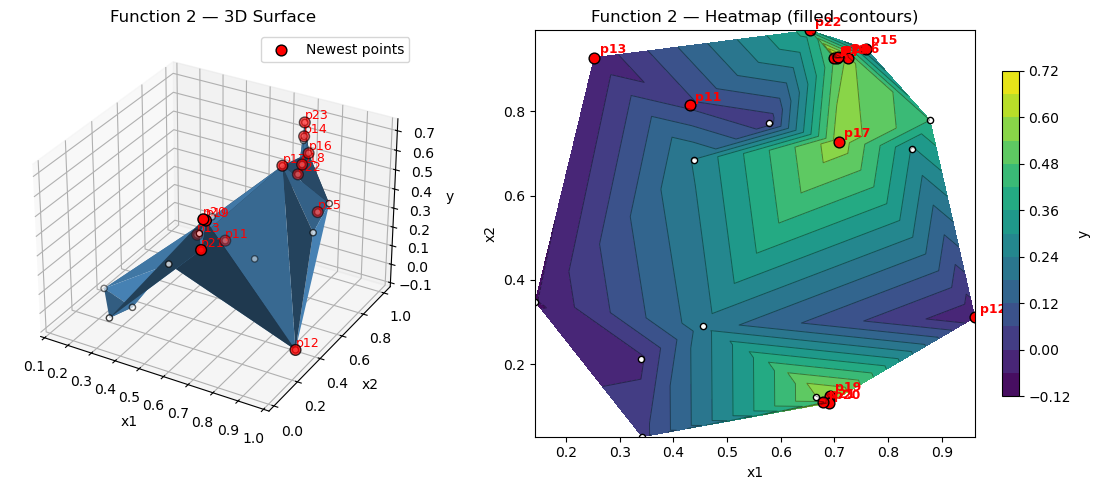

In [20]:
def plot_2d_to_1d(X, y, title_prefix="", n_new=2):
    """
    Plots a 3D trisurf and 2D heatmap of a 2D -> 1D function.
    Labels only the newest n_new points (e.g. p14, p15).
    """
    # Ensure correct shape
    X = np.atleast_2d(X)
    y = np.ravel(y)
    x1, x2 = X[:, 0], X[:, 1]
    n = len(y)

    # Index and labels for newest points
    newest_idx = np.arange(max(0, n - n_new), n)
    labels = [f"p{i+1}" for i in newest_idx]

    # ---------- Figure ----------
    fig = plt.figure(figsize=(12, 5))

    # --- Left: 3D surface ---
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_trisurf(x1, x2, y, color='steelblue', alpha=1.0)
    ax1.scatter(x1, x2, y, s=20, color='white', edgecolor='black')
    ax1.scatter(x1[newest_idx], x2[newest_idx], y[newest_idx],
                s=60, color='red', edgecolor='black', label='Newest points')

    # Label only newest points
    z_offset = 0.02 * (np.ptp(y) if np.ptp(y) > 0 else 1.0)
    for i, lbl in zip(newest_idx, labels):
        ax1.text(x1[i], x2[i], y[i] + z_offset, lbl, fontsize=9, color='red')

    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    ax1.set_zlabel("y")
    ax1.set_title(f"{title_prefix} — 3D Surface")
    ax1.legend()

    # --- Right: 2D heatmap ---
    ax2 = fig.add_subplot(1, 2, 2)
    cntr = ax2.tricontourf(x1, x2, y, levels=14, cmap='viridis')
    ax2.tricontour(x1, x2, y, levels=14, linewidths=0.7, colors='black', alpha=0.4)
    ax2.scatter(x1, x2, s=20, color='white', edgecolor='black')
    ax2.scatter(x1[newest_idx], x2[newest_idx], s=60, color='red', edgecolor='black')

    # Label only newest points
    for i, lbl in zip(newest_idx, labels):
        ax2.annotate(lbl, xy=(x1[i], x2[i]),
                     xytext=(x1[i] + 0.01, x2[i] + 0.01),
                     fontsize=9, color='red', weight='bold')

    ax2.set_xlabel("x1")
    ax2.set_ylabel("x2")
    ax2.set_title(f"{title_prefix} — Heatmap (filled contours)")
    fig.colorbar(cntr, ax=ax2, shrink=0.8, label="y")

    plt.tight_layout()
    plt.show()


plot_2d_to_1d(X, y, "Function 2", n_new=13)

## Bayesian Optimisation

In [21]:
# GP setup

kernel = (ConstantKernel(1.0, (1e-2, 1e2)) *
          Matern(length_scale=np.ones(d), nu=1.5) +
          WhiteKernel(noise_level=5e-3, noise_level_bounds=(1e-6, 1e-1)))

gp = GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=8,
                              normalize_y=True,
                              random_state=42)
gp.fit(X, y)

# Sobol candidates in [0,1]^d
sob = Sobol(d=d, scramble=True, seed=None)
C = sob.random_base2(m=18)

# GP predictions
mu, sigma = gp.predict(C, return_std=True)

# Expected Improvement (EI)
y_best = np.max(y)
xi = 0.01
imp = mu - y_best - xi
Z = imp / sigma
ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)

# Pick next query
x_next = C[np.argmax(ei)]

print(f"Next point to query: {x_next[0]:.6f}-{x_next[1]:.6f}")

Next point to query: 0.705579-0.929479


## Post Analysis

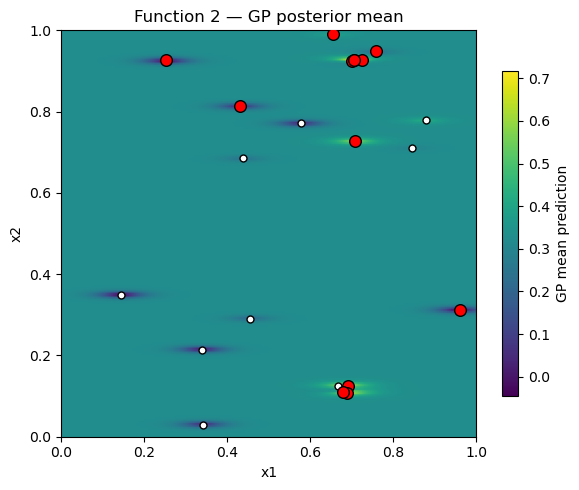

In [17]:
def plot_gp_mean_heatmap(gp, X, y, title="GP mean heatmap",
                         newest_idx=None, grid_n=200):

    X = np.atleast_2d(X)
    y = np.ravel(y)
    x1, x2 = X[:, 0], X[:, 1]

    # ---- build grid over [0,1] x [0,1] ----
    gx = np.linspace(0, 1, grid_n)
    gy = np.linspace(0, 1, grid_n)
    XX, YY = np.meshgrid(gx, gy)
    grid = np.column_stack([XX.ravel(), YY.ravel()])

    # ---- GP prediction on grid ----
    mu, _ = gp.predict(grid, return_std=True)
    MU = mu.reshape(grid_n, grid_n)

    # ---- plot ----
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(
        MU,
        origin="lower",
        extent=(0, 1, 0, 1),
        aspect="auto",
        cmap="viridis"
    )

    # scatter observed points
    ax.scatter(x1, x2, s=25, color="white", edgecolor="black", zorder=3)

    # highlight newest points if provided
    if newest_idx is not None:
        ax.scatter(
            x1[newest_idx], x2[newest_idx],
            s=70, color="red", edgecolor="black", zorder=4
        )

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title(title)
    plt.colorbar(im, ax=ax, shrink=0.8, label="GP mean prediction")

    plt.tight_layout()
    plt.show()

n_new = 13  # 13 new data points
plot_gp_mean_heatmap(
    gp,
    X,
    y,
    title="Function 2 — GP posterior mean",
    newest_idx=np.arange(len(y) - n_new, len(y))  
)